In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sps
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
%load_ext rpy2.ipython

c:\users\константин\appdata\local\programs\python\python38\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
val_data = pd.read_csv('val_dataset.csv')
text, emotions = val_data['Text'], val_data['Emotion']
predictions = pd.read_csv('val_predictions.csv')
accuracy = pd.DataFrame((predictions.values == emotions.values.reshape(-1, 1)) * 1, columns=predictions.columns)

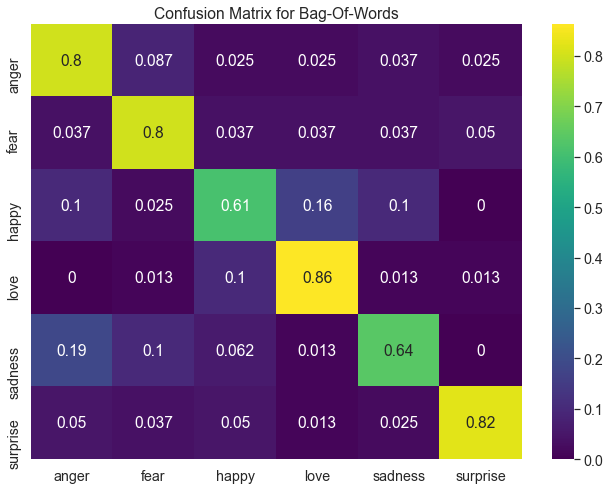

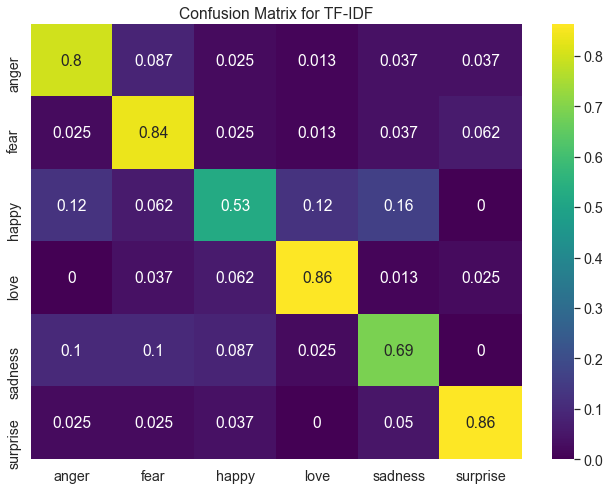

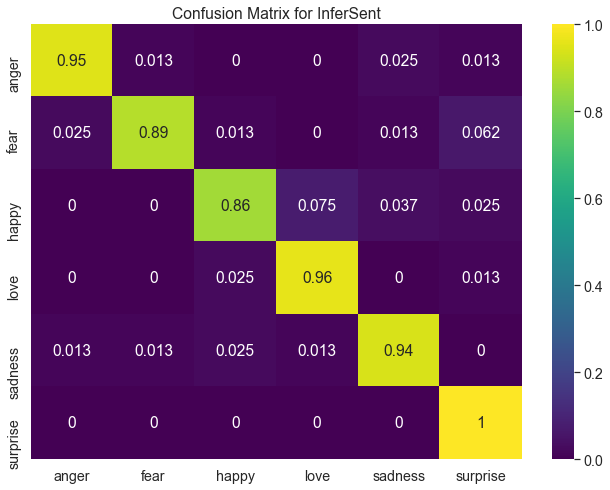

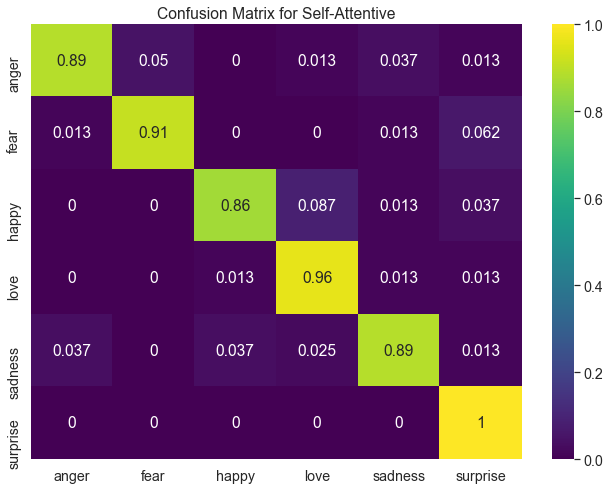

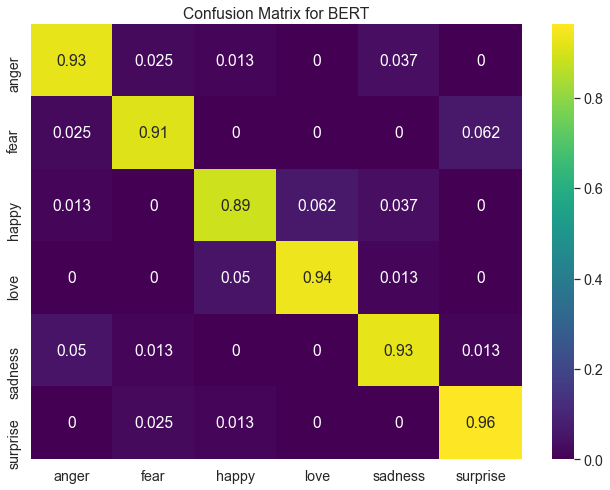

In [3]:
columns = list(predictions.columns)
columns[-1], columns[1] = columns[1], columns[-1]

for column in columns:
    cf_matrix = confusion_matrix(emotions, predictions[column], normalize='true', labels=np.unique(emotions))
    cf_matrix = pd.DataFrame(cf_matrix, columns=np.unique(emotions), index=np.unique(emotions))

    plt.figure(figsize=(11, 8))
    plt.title('Confusion Matrix for {}'.format(column))
    sns.heatmap(cf_matrix, cmap='viridis', annot=True);

In [4]:
index = (accuracy == 1).sum(axis=1) == 0

for sentence, y_true, y_pred in zip(text[index][:5], emotions[index], predictions[index].values):
    print('True label: {}'.format(y_true))
    print('Predicted labels --', end=' ')
    print(', '.join(['{}: {}'.format(column, pred) for column, pred in zip(predictions.columns, y_pred)]))
    print('Sentence: {}'.format(sentence))
    print('--------------------------------------------')
    print()

True label: love
Predicted labels -- Bag-Of-Words: surprise, BERT: sadness, InferSent: surprise, Self-Attentive: surprise, TF-IDF: surprise
Sentence: i cant decide how i feel about some of the supporting roles particularly the girlfriend and alfred molina both quite funny but were they one dimensional caricatures or legitimate characters simply overshadowed by a fantastic lead
--------------------------------------------

True label: fear
Predicted labels -- Bag-Of-Words: surprise, BERT: surprise, InferSent: surprise, Self-Attentive: surprise, TF-IDF: surprise
Sentence: im feeling overwhelmed i can just give people the middle finger or tell them to f off
--------------------------------------------

True label: anger
Predicted labels -- Bag-Of-Words: fear, BERT: fear, InferSent: fear, Self-Attentive: fear, TF-IDF: fear
Sentence: i do feel agitated restless or on edge quite often
--------------------------------------------

True label: anger
Predicted labels -- Bag-Of-Words: sadness, B

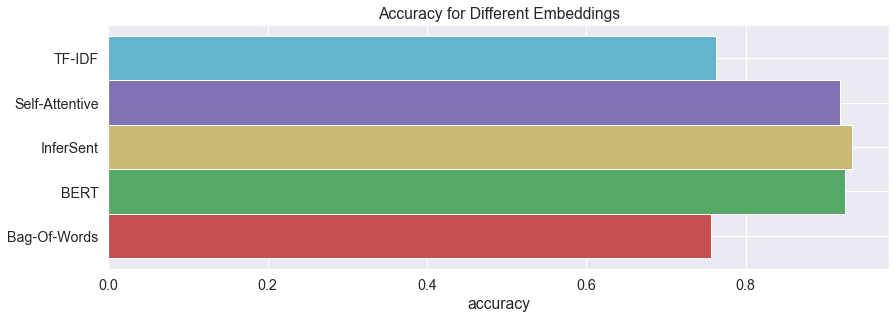

In [6]:
plt.figure(figsize=(14, 4.5))
plt.title('Accuracy for Different Embeddings')
plt.barh(accuracy.columns, accuracy.mean(), 1, color=['r', 'g', 'y', 'm', 'c'])
plt.xlabel('accuracy')
plt.show()

In [7]:
for name, acc in zip(accuracy.columns[1:4], accuracy.mean()[1:4]):
    print('{} accuracy: {}'.format(name, np.round(acc, 3)))

BERT accuracy: 0.925
InferSent accuracy: 0.933
Self-Attentive accuracy: 0.919


# Statistical Hypothesis Testing (Friedman Test) + Post-Hoc Analyzis

In [8]:
%%R -i accuracy

friedman.test(data.matrix(accuracy))


	Friedman rank sum test

data:  data.matrix(accuracy)
Friedman chi-squared = 205.82, df = 4, p-value < 2.2e-16



In [10]:
%%R -i accuracy

# install.packages('PMCMR')
library('PMCMR')

posthoc.friedman.nemenyi.test(data.matrix(accuracy))


	Pairwise comparisons using Nemenyi multiple comparison test	
             with q approximation for unreplicated blocked data 

data:  data.matrix(accuracy) 

               Bag-Of-Words BERT    InferSent Self-Attentive
BERT           0.00034      -       -         -             
InferSent      0.00014      0.99961 -         -             
Self-Attentive 0.00066      0.99988 0.99652   -             
TF-IDF         0.99988      0.00066 0.00028   0.00122       

P value adjustment method: none 
